# International Games Sales Analysis

I am goin to implement a data analysis for an online store Ice, which sells video games all over the world. We have a dataset at hand containing data on user and expert reviews, genres, gaming platforms, and game sales in different regions. My goal is to identify patterns that determine whether a game succeeds or not in order to spot potential big winners and for further advertising campaigns planning.

**Data description** 

`/datasets/games.csv `

- `Name`

- `Platform`

- `Year_of_Release`

- `Genre`

- `EU_sales` European sales in USD million)

- `NA_sales` (North American sales in USD million)

- `JP_sales` (Japanese sales in USD million)

- `Critic_Score`

- `User_Score`

- `Rating`

Let's import some libraries first

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np 

import datetime

import random

import re

from scipy import stats as st

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


Here is our dataset

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.000,Action,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.000,Sports,0.000,0.010,0.000,0.000,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.000,Adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.000,Platform,0.010,0.000,0.000,0.000,NaN,NaN,NaN


Let's look at the gaming platforms represented

In [3]:
games.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

We have 16715 rows within our dataset. Some of them have missing values, perhaps some duplicates as well. Some data types akso need to be corrected. Before I start the analysis, I have to go through the data and fix those (and maybe some other) issues.

## Data preparation

In this part, I am going to deal with missing values, restoring some if possible and deleting others; convert data into more convenient types and forms; and check for duplicated.

First, to make it more convenient, let's convert all the string values into the lowercase.

In [4]:
games = games.applymap(lambda s: s.lower() if type(s) == str else s)
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,wii sports,wii,2006.000,sports,41.360,28.960,3.770,8.450,76.000,8,e
1,super mario bros.,nes,1985.000,platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,mario kart wii,wii,2008.000,racing,15.680,12.760,3.790,3.290,82.000,8.3,e
3,wii sports resort,wii,2009.000,sports,15.610,10.930,3.280,2.950,80.000,8,e
4,pokemon red/pokemon blue,gb,1996.000,role-playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.000,action,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.000,sports,0.000,0.010,0.000,0.000,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.000,adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16713,spirits & spells,gba,2003.000,platform,0.010,0.000,0.000,0.000,NaN,NaN,NaN


The columns' names also need to be replaced with the lowercase titles.

In [5]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.000,sports,41.360,28.960,3.770,8.450,76.000,8,e
1,super mario bros.,nes,1985.000,platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,mario kart wii,wii,2008.000,racing,15.680,12.760,3.790,3.290,82.000,8.3,e
3,wii sports resort,wii,2009.000,sports,15.610,10.930,3.280,2.950,80.000,8,e
4,pokemon red/pokemon blue,gb,1996.000,role-playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.000,action,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.000,sports,0.000,0.010,0.000,0.000,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.000,adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16713,spirits & spells,gba,2003.000,platform,0.010,0.000,0.000,0.000,NaN,NaN,NaN


In [6]:
games.describe(include=['object']).T

,count,unique,top,freq
name,16713,11559,need for speed: most wanted,12
platform,16715,31,ps2,2161
genre,16713,12,action,3369
user_score,10014,96,tbd,2424
rating,9949,8,e,3990


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are two rows mising the game's names. Let's locate them.

In [8]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.000,NaN,1.780,0.530,0.000,0.080,NaN,NaN,NaN
14244,NaN,gen,1993.000,NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN


These two rows are really problematic since they miss lots of other values. Also those two games from 1993 do not seem that significant in terms of sales, so I prefer to drop those rows out.

In [9]:
games = games.dropna(subset = ['name'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Let's take a look at the 'rating' column

In [10]:
games['rating'].value_counts()

e       3990
t       2961
m       1563
e10+    1420
ec         8
k-a        3
rp         3
ao         1
Name: rating, dtype: int64

K-A is the formerly used rating signifying that the game is suitable for everybody. The abbreviation K-A stands for the same as the E, so I will unite them into one "E" category.

In [11]:
games.rating.replace(('k-a'), ('e'), inplace=True)
games['rating'].value_counts()

e       3993
t       2961
m       1563
e10+    1420
ec         8
rp         3
ao         1
Name: rating, dtype: int64

In [12]:
games['rating'].describe()

count     9949
unique       7
top          e
freq      3993
Name: rating, dtype: object

I assume that some games get released for multiple platforms during one and the same year under the same title. Thus, some of the missing values from the 'rating' column could be retrieved based on those games' genres and most common rating values of the corresponding genres. 

In [13]:
games['rating'] = games.groupby(['genre']).rating.transform(lambda x: x.fillna(x.mode().max()))
games['rating'].describe()

count     16713
unique        7
top           e
freq       7796
Name: rating, dtype: object

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


The NaNs left in the 'rating' column I will leave as they are for now.

Let's now take a look at the 'year_of_release' column. 

Some of the missing values could be restored based on the games' titles which sometimes include a hint. If the game is called FIFA 2004, for example, there is a high probability that it was released in 2003.

In [15]:
def year_from_title(row):
    year = re.findall(r'\b\d+\b', row)
    return year 
    
games['year_from_title'] = games['name'].apply(year_from_title)
games.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_title
16705,15 days,pc,2009.000,adventure,0.000,0.010,0.000,0.000,63.000,5.8,e,[15]
16706,men in black ii: alien escape,gc,2003.000,shooter,0.010,0.000,0.000,0.000,NaN,tbd,t,[]
16707,aiyoku no eustia,psv,2014.000,misc,0.000,0.000,0.010,0.000,NaN,NaN,e,[]
16708,woody woodpecker in crazy castle 5,gba,2002.000,platform,0.010,0.000,0.000,0.000,NaN,NaN,e,[5]
16709,score international baja 1000: the official game,ps2,2008.000,racing,0.000,0.000,0.000,0.000,NaN,NaN,e,[1000]
16710,samurai warriors: sanada maru,ps3,2016.000,action,0.000,0.000,0.010,0.000,NaN,NaN,t,[]
16711,lma manager 2007,x360,2006.000,sports,0.000,0.010,0.000,0.000,NaN,NaN,e,[2007]
16712,haitaka no psychedelica,psv,2016.000,adventure,0.000,0.000,0.010,0.000,NaN,NaN,e,[]
16713,spirits & spells,gba,2003.000,platform,0.010,0.000,0.000,0.000,NaN,NaN,e,[]
16714,winning post 8 2016,psv,2016.000,simulation,0.000,0.000,0.010,0.000,NaN,NaN,e,"[8, 2016]"


In [16]:
a=[]
b=[2010]
c=[2,2001]

In [17]:
def only_years(my_list):
    years=0
    for i in my_list:
        if int(i)>2000:
            years=int(i)-1
        else:
            continue
    return years

Let's check if the function works.

In [18]:
only_years(a)

0

In [19]:
only_years(b)

2009

In [20]:
only_years(c)

2000

In [21]:
games['year_from_title'] = games['year_from_title'].apply(only_years)

In [22]:
games.year_from_title.unique()

array([   0, 2014, 2003, 2099, 2004, 2006, 2002, 2011, 2007, 2013, 2001,
       2005, 2008, 2012, 2010, 2009, 2000, 2015, 2069, 2599, 2032, 2016,
       2047, 2024, 2204, 2019, 2048, 2088, 2499, 2141, 2999])

Now, I will replace some of the missing values from the 'year of release' column with the  retrieved values from the 'year from title' column

In [23]:
games['year_of_release'] = games['year_of_release'].fillna(games.pop('year_from_title'))

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


There might be some 0s now in the year_of_release column, I'll replace them with NaNs.

In [25]:
games['year_of_release'] = games['year_of_release'].replace(['0', 0], np.nan)

Let's check what the values look like now

In [26]:
games.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [28]:
games['year_of_release'].isna().sum()

252

We have 252 more missing values left in the 'year of release' column. Since, there is no way to restore them, I will have to drop them out.

In [29]:
games = games.dropna(subset = ['year_of_release'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       9851 non-null   object 
 10  rating           16461 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Let's convert the year values into integers.

In [30]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['year_of_release'].head()

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16461, dtype: int64

Let's take a look at the values in the 'user_score' and 'critic_score' columns.

Some of the values are 'tbd's (to be determined). Let's check if it relates to new games only.

In [31]:
games[games.user_score=='tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2007    193
2002    193
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

 TBD values do not depend on the year, so actually for us they are the same as NaN values

In [32]:
games.user_score.replace(('tbd'), (None), inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int64  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       8621 non-null   object 
 10  rating           16461 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


I'll convert user score to the same format as critic score.

In [33]:
games['user_score'] = pd.to_numeric(games['user_score']).round(decimals=3)
games['user_score'].head()

0       8.000
1         NaN
2       8.300
3       8.000
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: user_score, Length: 16461, dtype: float64

In [34]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int64  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       8621 non-null   float64
 10  rating           16461 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


There are some NaNs in both of the columns. That might be related to the fact that those games had poor sales (and/or were not marketed well/were not marketed at all), so users and critics never had a chance to approach and test them. I'll leave them as they are for now, since there is no wat to restore them.

For further analysis I will need every game's total sales values. Let's add such a column right away.

In [35]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.360,28.960,3.770,8.450,76.000,8.000,e,82.540
1,super mario bros.,nes,1985,platform,29.080,3.580,6.810,0.770,NaN,NaN,e,40.240
2,mario kart wii,wii,2008,racing,15.680,12.760,3.790,3.290,82.000,8.300,e,35.520
3,wii sports resort,wii,2009,sports,15.610,10.930,3.280,2.950,80.000,8.000,e,32.770
4,pokemon red/pokemon blue,gb,1996,role-playing,11.270,8.890,10.220,1.000,NaN,NaN,t,31.380
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.000,0.000,0.010,0.000,NaN,NaN,t,0.010
16711,lma manager 2007,x360,2006,sports,0.000,0.010,0.000,0.000,NaN,NaN,e,0.010
16712,haitaka no psychedelica,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,e,0.010
16713,spirits & spells,gba,2003,platform,0.010,0.000,0.000,0.000,NaN,NaN,e,0.010


Finally, let's check the data for duplicates.

In [36]:
games.duplicated().sum()

0

#### Intermediate conclusion
- The data was a bit messy, but I tried to tudy it up where possible.
- The string values and column names are converted to lowercase. 
- All floats now look like decimals with 3 digits after the decimal point.
- The rating column values are brough to actual ESRB categories.
- Some 'year of release' and 'genre' values are restored.  
- The 'total_sales' column was added based on existing international sales data.
- There are quite a lot unrestorable missing values left, especially in rating, critic and user score columns. We have to leave them as they are for now as nans (to easily drop them further where needed).

## Analysis
### Let's see many different games were released in different years.

In [37]:
games_in_years=games[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
games_in_years

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [38]:
games_in_years.describe()

,year_of_release,name
count,37.000,37.000
mean,1998.000,444.892
std,10.824,452.093
min,1980.000,9.000
25%,1989.000,36.000
50%,1998.000,338.000
75%,2007.000,764.000
max,2016.000,1428.000


Let's build some plot based on data above.

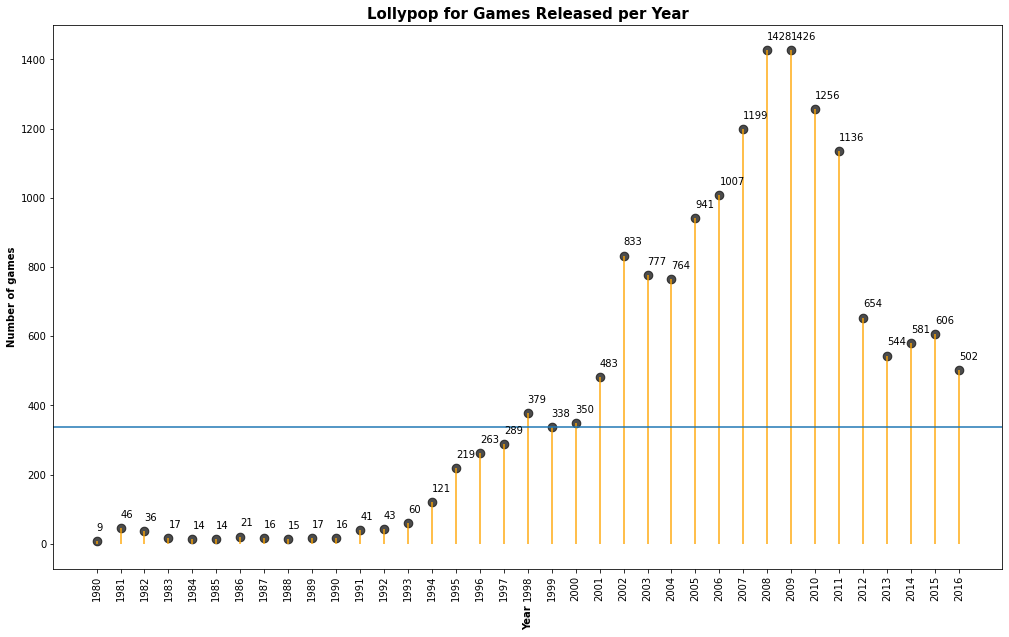

In [39]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=games_in_years.year_of_release, ymin=0, ymax=games_in_years.name, color='orange', alpha=0.7, linewidth=2)
ax.scatter(x=games_in_years.year_of_release,y=games_in_years.name, s=75, color='black',alpha=0.7)

ax.set_title("Lollypop for Games Released per Year", fontdict={'size':15},  fontweight='bold')
ax.set_ylabel('Number of games', fontweight='bold')
ax.set_xlabel('Year', rotation='vertical', fontweight='bold')
ax.set_xticks(games_in_years.year_of_release)
ax.set_xticklabels(games_in_years.year_of_release,rotation=90)
ax.axhline(y=338)

for row in games_in_years.itertuples():
    ax.text(row.year_of_release, row.name+30,s=row.name)

#### Intermediate conclusion
We can see that prior to 1994 not much new games were released annually, while the particular rise in releases took place between 2002 and 2011 with subsequent dowfall. The blue line is a median value for all the timespan analysed and it concides with the number of games released in the year 1999. The values below that line are perhaps less relevant for the analysis.

### Sales by platforms
Let's reveal which platforms have the greatest total sales and examine a distribution based on data for each year. 

In [40]:
platform_sales=games[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales', ascending=False).reset_index()
platform_sales

,platform,total_sales
0,ps2,1247.280
1,x360,961.300
2,ps3,931.340
3,wii,891.180
4,ds,802.790
5,ps,727.580
6,ps4,314.140
7,gba,312.880
8,psp,290.340
9,3ds,257.810


To examine the distribution of sales, let's use the z-score which shows how many standard deviations below or above the mean every platform's sales are.

In [41]:
platform_sales['sales_z']=(platform_sales['total_sales']-platform_sales['total_sales'].mean())/platform_sales['total_sales'].std()
platform_sales.sort_values(by='sales_z', ascending=False)

,platform,total_sales,sales_z
0,ps2,1247.280,2.788
1,x360,961.300,1.959
2,ps3,931.340,1.873
3,wii,891.180,1.756
4,ds,802.790,1.500
5,ps,727.580,1.282
6,ps4,314.140,0.085
7,gba,312.880,0.081
8,psp,290.340,0.016
9,3ds,257.810,-0.078


Platforms leading in sales vary a lot from the mean. Let's build a plot.

In [42]:
platform_sales['color']=['purple' if x<0 else 'orange' for x in platform_sales['sales_z']]
platform_sales

,platform,total_sales,sales_z,color
0,ps2,1247.280,2.788,orange
1,x360,961.300,1.959,orange
2,ps3,931.340,1.873,orange
3,wii,891.180,1.756,orange
4,ds,802.790,1.500,orange
5,ps,727.580,1.282,orange
6,ps4,314.140,0.085,orange
7,gba,312.880,0.081,orange
8,psp,290.340,0.016,orange
9,3ds,257.810,-0.078,purple


Text(0.5, 1.0, 'Deviations from the mean in platforms sales over the whole analysed period')

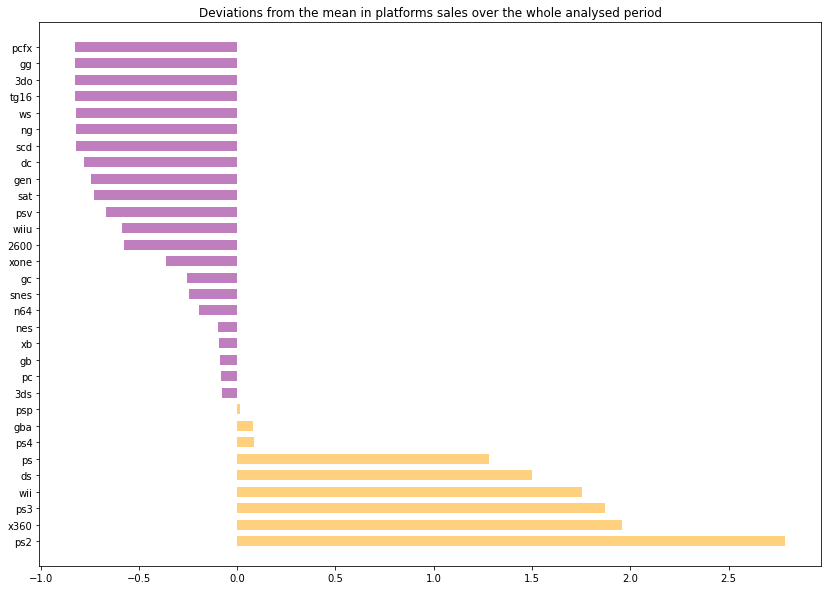

In [43]:
plt.figure(figsize=(14,10))
plt.hlines(y=platform_sales.platform,xmax=platform_sales.sales_z, xmin=0,color=platform_sales.color, alpha=0.5, linewidth=10)
plt.title('Deviations from the mean in platforms sales over the whole analysed period')
plt.show()

#### Intermediate conclusion
We can see that those platforms with the positive skew have better sales. Among those there are 6 platforms with z-values significantly above the mean (0), which are PS, DS, Wii, PS3, X360 and expecially PS2 - their sales are the greatest. 

### Platform lifecycle
Let's see how long does it generally take for new platforms to appear and old ones to fade.

In [44]:
platform_lifecycle=games.groupby(['platform'])['year_of_release'].agg(['min','max'])
platform_lifecycle['lifecycle']=platform_lifecycle['max']-platform_lifecycle['min']
platform_lifecycle.sort_values(by='lifecycle', ascending=False).reset_index()

,platform,min,max,lifecycle
0,pc,1985,2016,31
1,ds,1985,2013,28
2,gb,1988,2001,13
3,x360,2005,2016,11
4,psp,2004,2015,11
5,ps2,2000,2011,11
6,nes,1983,1994,11
7,dc,1998,2008,10
8,wii,2006,2016,10
9,ps3,2006,2016,10


I believe we should exclude those platforms with the lifecycle less than 2 years. They clearly coincide with the least successfull platforms in sales and constitute outliers for our analysis. PC also represents an outlier because of its incomparable persistence on market that could be explained by the fact that PCs are used not as gaming platforms only, but for variety of purposes. So, I will exclude PC too.

In [45]:
platform_lifecycle=platform_lifecycle[platform_lifecycle.lifecycle>1]
platform_lifecycle=platform_lifecycle[platform_lifecycle.lifecycle<30]
platform_lifecycle.sort_values(by='min', ascending=False).reset_index()

,platform,min,max,lifecycle
0,xone,2013,2016,3
1,ps4,2013,2016,3
2,wiiu,2012,2016,4
3,3ds,2011,2016,5
4,psv,2011,2016,5
5,wii,2006,2016,10
6,ps3,2006,2016,10
7,x360,2005,2016,11
8,psp,2004,2015,11
9,gc,2001,2007,6


In [46]:
platform_lifecycle['lifecycle'].describe()

count   25.000
mean     8.120
std      5.223
min      2.000
25%      5.000
50%      8.000
75%     10.000
max     28.000
Name: lifecycle, dtype: float64

In [47]:
platform_lifecycle['lifecycle'].mode()

0    11
dtype: int64

In [48]:
grouped_by_platform=games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')
grouped_by_platform.head()

,platform,year_of_release,total_sales
0,2600,1980,11.380
1,2600,1981,35.680
2,2600,1982,28.880
3,2600,1983,5.840
77,nes,1983,10.960
...,...,...,...
156,ps4,2016,69.250
152,ps3,2016,3.600
17,3ds,2016,15.140
224,x360,2016,1.520


Text(0.5, 1.0, 'Annual sales by platform')

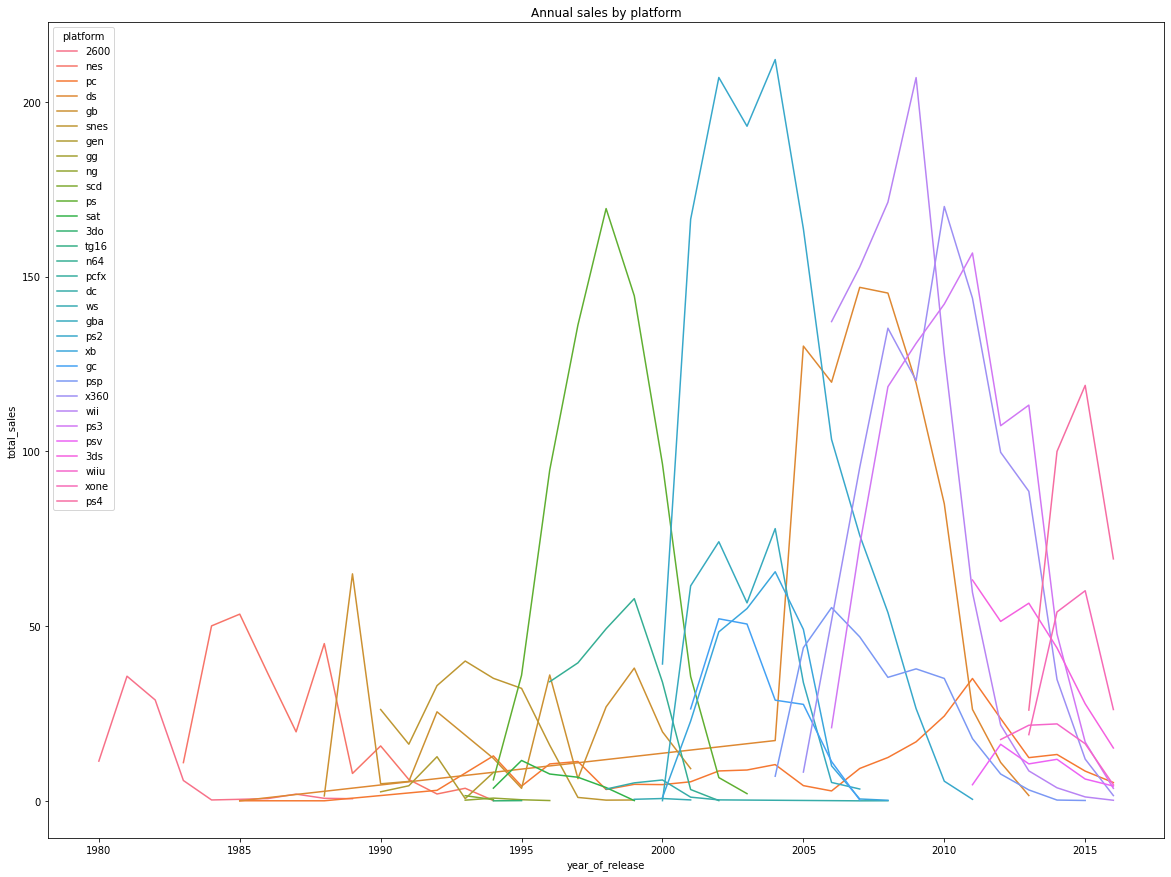

In [49]:
plt.figure(figsize=(20,15))
ax = sns.lineplot(data=grouped_by_platform, x="year_of_release", y="total_sales",hue="platform")
plt.title('Annual sales by platform')
plt.show()

#### Intermediate conclusion
The median and mean platform lifecycle values are pretty close and constitute about 8 years. Half of the values fall between 5 and 10 years. Some not that successful platforms 'live' only for couple of years before they get removed; others succeed to stay afloat for two decades. However, even such a popular platform as PS2 eventualy get removed from the market and replaced by a more modern version.

We might infer, that, as time goes on, platforms become more 'long-living', since no platform launched after 2000 lived less than 6 years, and all of the platforms launched after 2005 are still in market in 2016.
Notably, all the highest in sales platforms determined earlier are among the long-living ones (lifecycle span above the average). There is no platform still 'alive' in 2016 that was launched before 2000.

### Data limitation

In order to base my analysis on 'fresh' data I will limit my analysis by the year 2013, the year the latest platforms XOne and PS4 were launched. 

In [50]:
games_new=games[games.year_of_release>=2013]
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.020,9.090,0.980,3.960,97.000,8.200,m,21.050
23,grand theft auto v,x360,2013,action,9.660,5.140,0.060,1.410,97.000,8.100,m,16.270
31,call of duty: black ops 3,ps4,2015,shooter,6.030,5.860,0.360,2.380,NaN,NaN,m,14.630
33,pokemon x/pokemon y,3ds,2013,role-playing,5.280,4.190,4.350,0.780,NaN,NaN,t,14.600
42,grand theft auto v,ps4,2014,action,3.960,6.310,0.380,1.970,97.000,8.300,m,12.620
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,e,0.010
16707,aiyoku no eustia,psv,2014,misc,0.000,0.000,0.010,0.000,NaN,NaN,e,0.010
16710,samurai warriors: sanada maru,ps3,2016,action,0.000,0.000,0.010,0.000,NaN,NaN,t,0.010
16712,haitaka no psychedelica,psv,2016,adventure,0.000,0.000,0.010,0.000,NaN,NaN,e,0.010


### Platforms market performance

Now I need to determin which platforms are leading in sales; which ones are growing and which are shrinking. I'll bild a pivot table for that matter.

In [51]:
platforms_sales_new=pd.pivot_table(games_new,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
platforms_sales_new

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2013,56.570,1.540,12.380,113.250,25.990,3.140,10.590,8.590,21.650,88.580,18.960
2014,43.760,0.000,13.280,47.760,100.000,0.240,11.900,3.750,22.030,34.740,54.070
2015,27.780,0.000,8.520,16.820,118.900,0.120,6.250,1.140,16.350,11.960,60.140
2016,15.140,0.000,5.250,3.600,69.250,0.000,4.250,0.180,4.600,1.520,26.150


I'll calculate the dufferences between the annual sales values for every platform.

In [52]:
platforms_sales_new.shift(+1)

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,56.570,1.540,12.380,113.250,25.990,3.140,10.590,8.590,21.650,88.580,18.960
2015,43.760,0.000,13.280,47.760,100.000,0.240,11.900,3.750,22.030,34.740,54.070
2016,27.780,0.000,8.520,16.820,118.900,0.120,6.250,1.140,16.350,11.960,60.140


In [53]:
dynamics = (platforms_sales_new - platforms_sales_new.shift(+1)).T
dynamics

year_of_release,2013,2014,2015,2016
platform,,,,
3ds,NaN,-12.810,-15.980,-12.640
ds,NaN,-1.540,0.000,0.000
pc,NaN,0.900,-4.760,-3.270
ps3,NaN,-65.490,-30.940,-13.220
ps4,NaN,74.010,18.900,-49.650
psp,NaN,-2.900,-0.120,-0.120
psv,NaN,1.310,-5.650,-2.000
wii,NaN,-4.840,-2.610,-0.960
wiiu,NaN,0.380,-5.680,-11.750


Text(0.5, 1.0, 'Changes in annual sales by platform')

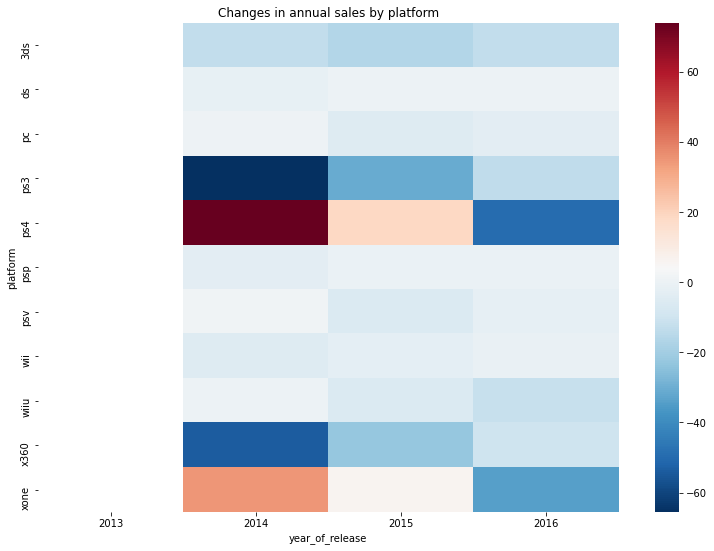

In [54]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics, cmap='RdBu_r')
plt.title('Changes in annual sales by platform')
plt.show()

Let's see the same but in relative terms

In [55]:
dynamics1 = (platforms_sales_new/platforms_sales_new.shift(+1)-1).T
dynamics1

year_of_release,2013,2014,2015,2016
platform,,,,
3ds,NaN,-0.226,-0.365,-0.455
ds,NaN,-1.000,NaN,NaN
pc,NaN,0.073,-0.358,-0.384
ps3,NaN,-0.578,-0.648,-0.786
ps4,NaN,2.848,0.189,-0.418
psp,NaN,-0.924,-0.500,-1.000
psv,NaN,0.124,-0.475,-0.320
wii,NaN,-0.563,-0.696,-0.842
wiiu,NaN,0.018,-0.258,-0.719


Text(0.5, 1.0, 'Changes in annual sales by platform. % ')

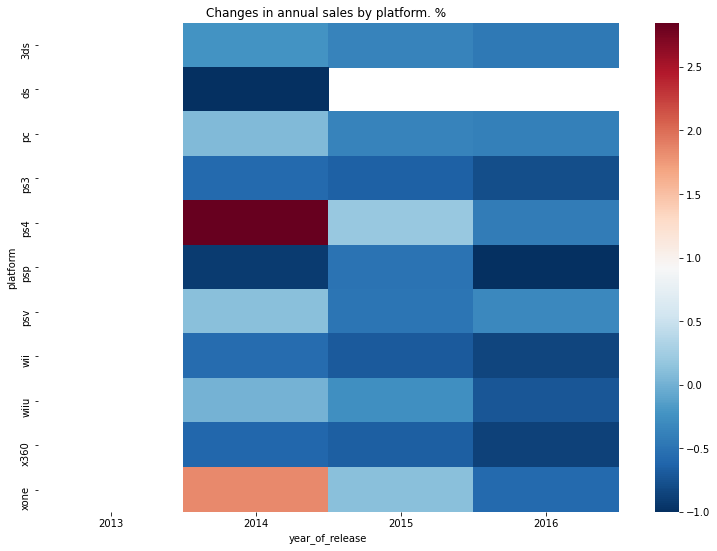

In [56]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics1, cmap='RdBu_r')
plt.title('Changes in annual sales by platform. % ')
plt.show()

#### Intermediate conclusion
The recent years appeared to be not that good for the industry. In 2016, no platform saw rise in sales compared to the 2015. 

While PS4 and XOne showed the best sales' growth numbers in 2013-2015, their sales' growth was slowing down, and the slump they experienced in 2016 was the hardest compared to all other platforms. However, that might be related to temporary entire market's downfall.

At the same time, WII and PSP, while still experiencing decreses in sales, show a positive sales dynamics. Every annual decrease in sales was smaller than in a precedent year (with an exception for PSP the in 2015-2016 when the dynamics stagnated). That could be a symptom of recovery and probable growth in future. However, those to platforms stopped to be technicallly supported by their production companies in 2013 and 2014 respectively, so they might be removed from the market in upcoming years.

To sum up, PS4 and XOne still seem to be the most promising platforms, since they are new ones in the market, and represent the latest versions of popular gaming brands - Play Station and Xbox respectively. Except for the downfall in 2016, those platforms showed good sales upon initial launching, and are not going to have strong competitiors in the upcoming years (their potential competitor, Nindendo's WiiU, shows poor performance in the market).

Speaking of the portable gaming consoles, the Nindendos' 3DS is still leading in terms of overall sales, but its sales have been continiously shrinking, while its competitor - Playstation's PSV, introduced to substitute the older PSP - shows volatile sales dynamics, so, for now, its hard to conclude anything specific.

### Global sales dispersion by platform

Now, let's build a box plot for the global sales of all games, broken down by platform. 
I need to examine whether there are any significant differences in sales.

For that matter, I need to group the games upon platforms and sum up the total sales of those games.

In [57]:
grouped_games=games_new.groupby(['platform', 'name'])['total_sales'].sum().reset_index()
grouped_games.head()

,platform,name,total_sales
0,3ds,beyblade burst,0.030
1,3ds,fire emblem fates,1.670
2,3ds,frozen: olaf's quest,0.590
3,3ds,haikyu!! cross team match!,0.040
4,3ds,12-sai. honto no kimochi,0.070
...,...,...,...
2228,xone,xcom 2,0.040
2229,xone,zombie army trilogy,0.110
2230,xone,zombiu,0.010
2231,xone,zoo tycoon (2013),0.360


Let's order the platforms from the least profitable to the most profitable

In [58]:
order=grouped_games.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']
order

1       ds
5      psp
7      wii
6      psv
2       pc
8     wiiu
9     x360
0      3ds
10    xone
3      ps3
4      ps4
Name: platform, dtype: object

Text(0.5, 1.0, 'Global sales dispersion by platform')

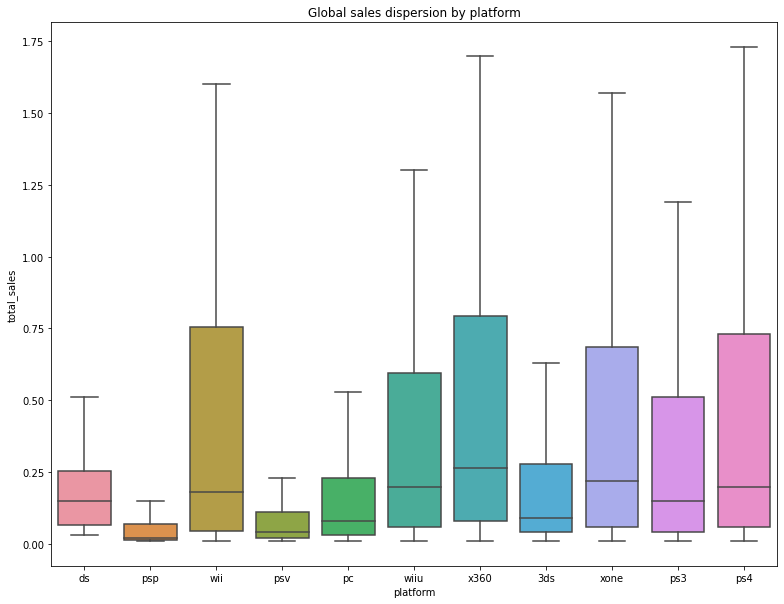

In [59]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped_games,order=order,showfliers = False)
plt.title('Global sales dispersion by platform')
plt.show()

#### Intermediate conclusion
We can see from the plot that the among profitable platforms the sales' median values are relatevely close to each other. At the same time, for X360 median sales value is the highest (slightly higher than for newcomers XOne and PS4, and visibly higher than for its primary competotor PS3). That might mean that releasing a game for X360 might be a bit more profitable for a game developer. 
At the same time, the distributions of values for PS4 and XOne (newer models which come to replace the former market leaders X360 and PS3) do not differ that much.

### Critics and Users Score Affect Examination 

In [60]:
ps3 = games_new.query('platform == "ps3"').dropna()
ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.020,9.090,0.980,3.960,97.000,8.200,m,21.050
69,call of duty: ghosts,ps3,2013,shooter,4.100,3.630,0.380,1.250,71.000,2.600,m,9.360
126,fifa 14,ps3,2013,sports,0.780,4.240,0.070,1.370,86.000,4.300,e,6.460
149,the last of us,ps3,2013,action,2.410,2.180,0.280,0.990,95.000,9.100,m,5.860
337,assassin's creed iv: black flag,ps3,2013,action,1.330,1.680,0.130,0.570,88.000,8.100,m,3.710
...,...,...,...,...,...,...,...,...,...,...,...,...
15416,the awakened fate ultimatum,ps3,2014,role-playing,0.000,0.000,0.020,0.000,65.000,7.300,t,0.020
15418,xblaze: lost memories,ps3,2015,adventure,0.020,0.000,0.000,0.000,63.000,6.200,m,0.020
15533,battle princess of arcadias,ps3,2013,role-playing,0.000,0.000,0.020,0.000,69.000,7.900,t,0.020
15742,invizimals: the lost kingdom,ps3,2013,action,0.000,0.020,0.000,0.000,50.000,5.000,e10+,0.020


In [61]:
ps3 = ps3.drop(['platform', 'genre', 'year_of_release', 'other_sales', 'rating'], axis=1)
ps3.head()

,name,na_sales,eu_sales,jp_sales,critic_score,user_score,total_sales
16,grand theft auto v,7.020,9.090,0.980,97.000,8.200,21.050
69,call of duty: ghosts,4.100,3.630,0.380,71.000,2.600,9.360
126,fifa 14,0.780,4.240,0.070,86.000,4.300,6.460
149,the last of us,2.410,2.180,0.280,95.000,9.100,5.860
337,assassin's creed iv: black flag,1.330,1.680,0.130,88.000,8.100,3.710
...,...,...,...,...,...,...,...
15416,the awakened fate ultimatum,0.000,0.000,0.020,65.000,7.300,0.020
15418,xblaze: lost memories,0.020,0.000,0.000,63.000,6.200,0.020
15533,battle princess of arcadias,0.000,0.000,0.020,69.000,7.900,0.020
15742,invizimals: the lost kingdom,0.000,0.020,0.000,50.000,5.000,0.020


Text(0.5, 1.05, 'Correllation between Games Evaluation and Sales')

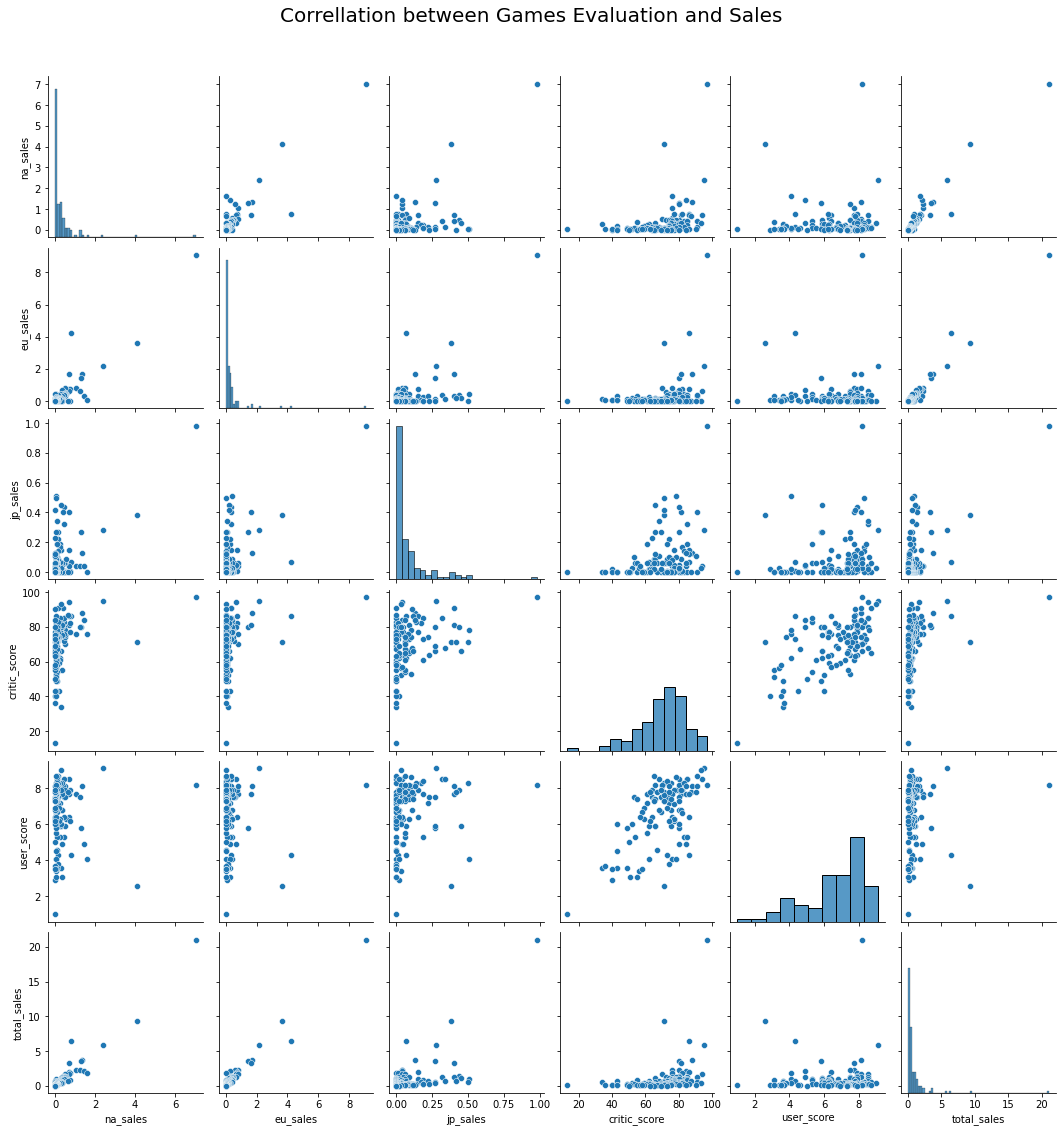

In [62]:
corr = sns.pairplot(ps3)
corr.fig.suptitle("Correllation between Games Evaluation and Sales", y=1.05, size=20)
plt.show()

From the scatter plot we can see that, as the critics' score increases, so do the sales in all regions (in Japan slightly less). For users' score there is similar dynamics, though less straight. Let's look at the numbers.

In [63]:
ps3.corr()

,na_sales,eu_sales,jp_sales,critic_score,user_score,total_sales
na_sales,1.000,0.897,0.553,0.334,0.009,0.961
eu_sales,0.897,1.000,0.580,0.310,0.000,0.982
jp_sales,0.553,0.580,1.000,0.297,0.215,0.625
critic_score,0.334,0.310,0.297,1.000,0.600,0.334
user_score,0.009,0.000,0.215,0.600,1.000,0.023
total_sales,0.961,0.982,0.625,0.334,0.023,1.000


#### Intermediate conclusion
From the correllation table, we can see that there is moderate positive correlation between PS3 games sales and evaluation of those games by critics. The critics' influence is stringer in North America a bit weaker in Japan, with EU in the middle. 
For users score, correlation is weak for NA and EU, but moderate for Japan. The Japanese PS3 gamers seem to trust other users' evaluation of games slightly more than North Americans and Europeans.

### Let's check whether the correllations found for PS3 are also relevant for other platforms.

First, I need to find out if games released on PS3 were also released on other platforms. 

In [64]:
other_platforms = games_new.query('platform != "ps3"').dropna().assign(result=ps3['name'].isin(games_new['name']))
other_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,result
23,grand theft auto v,x360,2013,action,9.660,5.140,0.060,1.410,97.000,8.100,m,16.270,NaN
42,grand theft auto v,ps4,2014,action,3.960,6.310,0.380,1.970,97.000,8.300,m,12.620,NaN
60,call of duty: ghosts,x360,2013,shooter,6.730,2.560,0.040,0.910,73.000,2.600,m,10.240,NaN
77,fifa 16,ps4,2015,sports,1.120,6.120,0.060,1.280,82.000,4.300,e,8.580,NaN
92,call of duty: advanced warfare,ps4,2014,shooter,2.810,3.480,0.140,1.230,83.000,5.700,m,7.660,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16597,saints row: gat out of hell,xone,2015,action,0.000,0.010,0.000,0.000,65.000,6.000,m,0.010,NaN
16630,sébastien loeb rally evo,xone,2016,racing,0.000,0.010,0.000,0.000,63.000,8.200,e,0.010,NaN
16652,fast racing neo,wiiu,2016,action,0.000,0.010,0.000,0.000,81.000,8.500,e,0.010,NaN
16660,prison architect,xone,2016,action,0.010,0.000,0.000,0.000,74.000,6.700,t,0.010,NaN


In [65]:
other_platforms.platform.unique()

array(['x360', 'ps4', 'wiiu', 'xone', '3ds', 'pc', 'psv', 'psp'],
      dtype=object)

In [66]:
wiiu = other_platforms.query('platform == "wiiu"').drop(['platform', 'genre', 'year_of_release', 'other_sales', 'rating'], axis=1)
x360 = other_platforms.query('platform == "x360"').drop(['platform', 'genre', 'year_of_release', 'other_sales', 'rating'], axis=1)
ps4 = other_platforms.query('platform == "ps4"').drop(['platform', 'genre', 'year_of_release', 'other_sales', 'rating'], axis=1)
psv = other_platforms.query('platform == "psv"').drop(['platform', 'genre', 'year_of_release', 'other_sales', 'rating'], axis=1)

In [67]:
wiiu.corr()

,na_sales,eu_sales,jp_sales,critic_score,user_score,total_sales
na_sales,1.000,0.973,0.811,0.391,0.400,0.981
eu_sales,0.973,1.000,0.871,0.401,0.427,0.991
jp_sales,0.811,0.871,1.000,0.272,0.341,0.903
critic_score,0.391,0.401,0.272,1.000,0.721,0.380
user_score,0.400,0.427,0.341,0.721,1.000,0.409
total_sales,0.981,0.991,0.903,0.380,0.409,1.000


In [68]:
x360.corr()

,na_sales,eu_sales,jp_sales,critic_score,user_score,total_sales
na_sales,1.000,0.880,0.678,0.343,-0.008,0.986
eu_sales,0.880,1.000,0.652,0.336,-0.002,0.948
jp_sales,0.678,0.652,1.000,0.291,0.075,0.690
critic_score,0.343,0.336,0.291,1.000,0.521,0.350
user_score,-0.008,-0.002,0.075,0.521,1.000,-0.006
total_sales,0.986,0.948,0.690,0.350,-0.006,1.000


In [69]:
ps4.corr()

,na_sales,eu_sales,jp_sales,critic_score,user_score,total_sales
na_sales,1.000,0.716,0.532,0.414,-0.018,0.894
eu_sales,0.716,1.000,0.521,0.346,-0.046,0.952
jp_sales,0.532,0.521,1.000,0.322,0.177,0.593
critic_score,0.414,0.346,0.322,1.000,0.556,0.406
user_score,-0.018,-0.046,0.177,0.556,1.000,-0.029
total_sales,0.894,0.952,0.593,0.406,-0.029,1.000


In [70]:
psv.corr()

,na_sales,eu_sales,jp_sales,critic_score,user_score,total_sales
na_sales,1.000,0.642,0.119,0.099,0.171,0.823
eu_sales,0.642,1.000,0.031,0.273,0.182,0.806
jp_sales,0.119,0.031,1.000,0.167,0.169,0.510
critic_score,0.099,0.273,0.167,1.000,0.510,0.255
user_score,0.171,0.182,0.169,0.510,1.000,0.244
total_sales,0.823,0.806,0.510,0.255,0.244,1.000


#### Intermediate conclusion
We see quite similar a bit different situation in the cases of different platforms. Critic scores tend to have moderate positive influence on salesfor most of the platforms. The highest correlation between critic score and sales is seen for PS4 in NA market and for WiiU  in the EU market, while the Japanese seems to be the last who tend to rely on critics evaluation of games. At the same time, PSV represents an exception here - in its case the influence is quite low in Japan and the lowest in NA, while being moderate in the EU market.

User scores have a low-to-none influence on sales for home gaming concoles (sometimes even with negative but still very weak effect), with slightly higher figures in Japan in the case of PS4, though correlations there are also quite weak. Portable platforms, like PSV and WiiU show different metrics. For WiiU the user score influence is moderate (strongest in EU). For PSV it's quite low but visbly higher than for home consoles.



### Sales distribution by game genres
Let's take a look at the sales' distribution by genres.

In [71]:
genres = pd.pivot_table(games_new, index='genre', values='total_sales', aggfunc='sum')
genres

,total_sales
genre,
action,321.870
adventure,23.640
fighting,35.310
misc,62.820
platform,42.630
puzzle,3.170
racing,39.890
role-playing,145.890
shooter,232.980


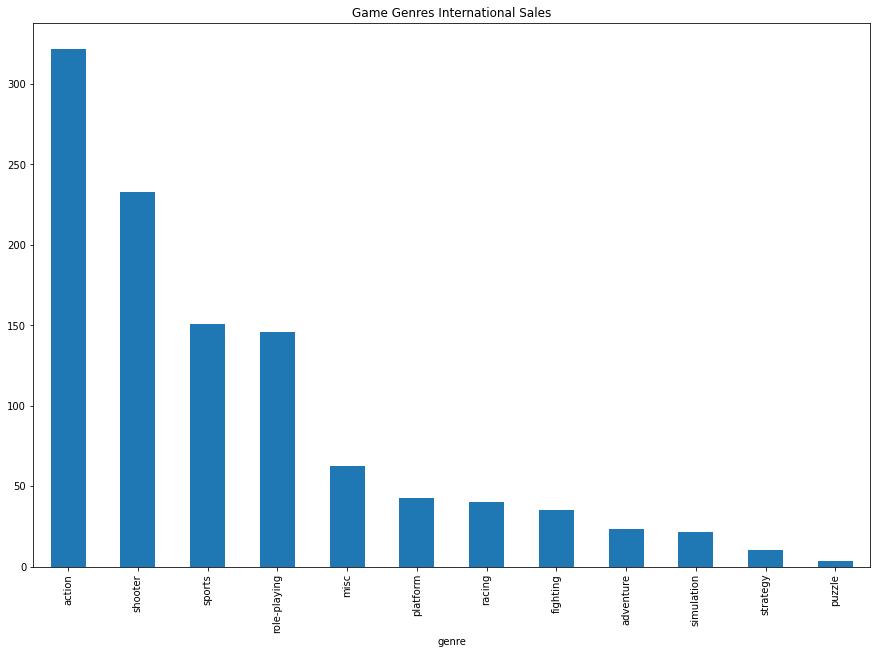

In [72]:
genres['total_sales'].sort_values(ascending=False).plot(kind='bar', figsize = (15,10), title = "Game Genres International Sales")
plt.show()

In [73]:
genres_mean = pd.pivot_table(games_new, index='genre', values='total_sales', aggfunc='mean')
genres_mean.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
shooter,1.246
sports,0.704
platform,0.576
role-playing,0.500
racing,0.469
fighting,0.441
action,0.420
misc,0.405
simulation,0.351


#### Intermediate conclusions:
- We can see that action games are the most popular in terms of total international sales, with sports and shooters placed 2nd and 3rd respectively. Adventures, puzzles and strategies are the least sold genres. Dynamic games based on action and arenalin-boosting sell better than games requiring more patience and intellecual resource.  
- Shooters and platforms bring more money on average, though they do not dominate in total sales.


### Sales broken down by regions

Let's move on to creating a user profile for each region (NA, EU, JP).
I need to determine the top five platforms, the top five genres, and whether the ESRB ratings affect sales in individual regions.


I need to clean the data completely out of NaNs.

In [74]:
games_new_clean = games_new.dropna().reset_index()
games_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            983 non-null    int64  
 1   name             983 non-null    object 
 2   platform         983 non-null    object 
 3   year_of_release  983 non-null    int64  
 4   genre            983 non-null    object 
 5   na_sales         983 non-null    float64
 6   eu_sales         983 non-null    float64
 7   jp_sales         983 non-null    float64
 8   other_sales      983 non-null    float64
 9   critic_score     983 non-null    float64
 10  user_score       983 non-null    float64
 11  rating           983 non-null    object 
 12  total_sales      983 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 100.0+ KB


In [75]:
games_new_clean['genre'].value_counts()

action          312
shooter         133
role-playing    127
sports          111
racing           59
platform         50
adventure        47
misc             43
fighting         42
strategy         26
simulation       26
puzzle            7
Name: genre, dtype: int64

#### North America

Let's see what are the most selling platforms in North America

In [76]:
na_platforms_sum=games_new_clean.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_platforms_sum

,platform,na_sales
3,ps4,84.500
8,xone,76.050
7,x360,50.850
2,ps3,42.130
6,wiiu,23.040


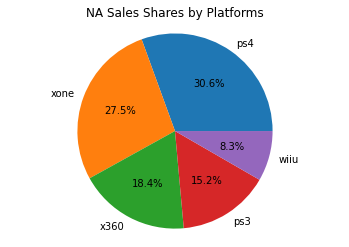

In [77]:
plt.pie(na_platforms_sum['na_sales'], labels = na_platforms_sum['platform'],autopct='%1.1f%%')
plt.title('NA Sales Shares by Platforms')
plt.axis('equal')
plt.show()

In [78]:
na_platforms_mean=games_new_clean.groupby(['platform'])['na_sales'].mean().reset_index().sort_values(by='na_sales',ascending=False).head()
na_platforms_mean

,platform,na_sales
7,x360,0.628
8,xone,0.458
2,ps3,0.351
3,ps4,0.337
6,wiiu,0.334


In [79]:
na_genres_sum=games_new_clean.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_genres_sum

,genre,na_sales
0,action,97.080
8,shooter,81.050
10,sports,51.180
7,role-playing,23.080
4,platform,13.750


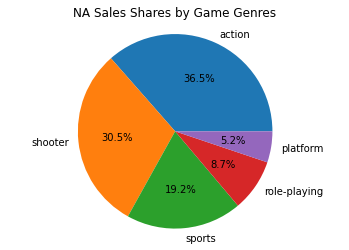

In [80]:
plt.pie(na_genres_sum['na_sales'], labels = na_genres_sum['genre'],autopct='%1.1f%%')
plt.title('NA Sales Shares by Game Genres')
plt.axis('equal')
plt.show()

In [81]:
na_genres_mean=games_new_clean.groupby(['genre'])['na_sales'].mean().reset_index().sort_values(by='na_sales',ascending=False).head()
na_genres_mean

,genre,na_sales
8,shooter,0.609
10,sports,0.461
0,action,0.311
4,platform,0.275
3,misc,0.205


In [82]:
na_rating_sum=games_new.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_rating_sum

,rating,na_sales
2,m,184.770
0,e,102.090
3,t,96.610
1,e10+,54.240


In [83]:
na_rating_mean=games_new_clean.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales',ascending=False).head()
na_rating_mean

,rating,na_sales
2,m,0.471
0,e,0.307
1,e10+,0.233
3,t,0.167


#### European Union
Let's see what is the situation on the European Union

In [84]:
eu_platforms_sum=games_new_clean.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_platforms_sum

,platform,eu_sales
3,ps4,112.440
2,ps3,43.290
8,xone,42.230
7,x360,26.540
1,pc,21.930


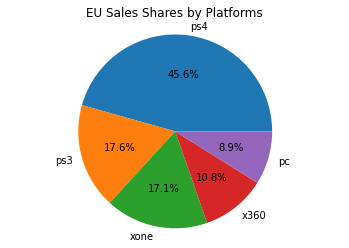

In [85]:
plt.pie(eu_platforms_sum['eu_sales'], labels = eu_platforms_sum['platform'],autopct='%1.1f%%')
plt.title('EU Sales Shares by Platforms')
plt.axis('equal')
plt.show()

In [86]:
eu_platforms_mean=games_new_clean.groupby(['platform'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_platforms_mean

,platform,eu_sales
3,ps4,0.448
2,ps3,0.361
7,x360,0.328
8,xone,0.254
6,wiiu,0.233


In [87]:
eu_genres_sum=games_new_clean.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_genres_sum

,genre,eu_sales
0,action,91.150
8,shooter,64.040
10,sports,46.960
7,role-playing,19.280
6,racing,16.900


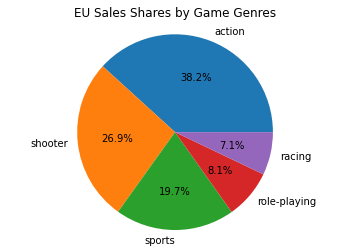

In [88]:
plt.pie(eu_genres_sum['eu_sales'], labels = eu_genres_sum['genre'],autopct='%1.1f%%')
plt.title('EU Sales Shares by Game Genres')
plt.axis('equal')
plt.show()

In [89]:
eu_genres_mean=games_new_clean.groupby(['genre'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_genres_mean

,genre,eu_sales
8,shooter,0.482
10,sports,0.423
0,action,0.292
6,racing,0.286
9,simulation,0.253


In [90]:
eu_rating_sum=games_new_clean.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_rating_sum

,rating,eu_sales
2,m,135.650
0,e,70.220
3,t,39.790
1,e10+,30.100


In [91]:
eu_rating_mean=games_new_clean.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_rating_mean

,rating,eu_sales
2,m,0.417
0,e,0.328
1,e10+,0.179
3,t,0.144


#### Japan
Let's see what are the most selling platforms in Japan

In [92]:
jp_platforms_sum=games_new_clean.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_platforms_sum

,platform,jp_sales
0,3ds,14.160
2,ps3,10.990
3,ps4,9.430
6,wiiu,8.360
5,psv,5.710


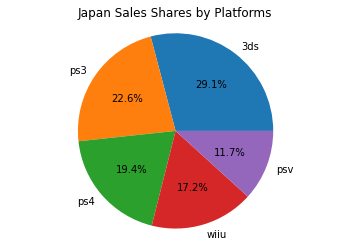

In [93]:
plt.pie(jp_platforms_sum['jp_sales'], labels = jp_platforms_sum['platform'],autopct='%1.1f%%')
plt.title('Japan Sales Shares by Platforms')
plt.axis('equal')
plt.show()

In [94]:
jp_platforms_mean=games_new_clean.groupby(['platform'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_platforms_mean

,platform,jp_sales
0,3ds,0.202
4,psp,0.150
6,wiiu,0.121
2,ps3,0.092
5,psv,0.074


In [95]:
jp_genres_sum=games_new_clean.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_genres_sum

,genre,jp_sales
0,action,14.610
7,role-playing,12.440
8,shooter,5.280
4,platform,4.160
3,misc,3.120


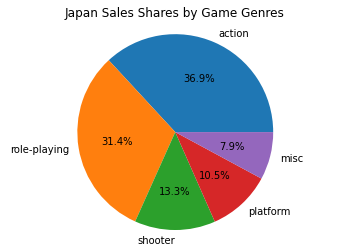

In [96]:
plt.pie(jp_genres_sum['jp_sales'], labels = jp_genres_sum['genre'],autopct='%1.1f%%')
plt.title('Japan Sales Shares by Game Genres')
plt.axis('equal')
plt.show()

In [97]:
jp_genres_mean=games_new_clean.groupby(['genre'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_genres_mean

,genre,jp_sales
7,role-playing,0.098
4,platform,0.083
9,simulation,0.076
5,puzzle,0.073
3,misc,0.073


In [98]:
jp_rating_sum=games_new_clean.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_rating_sum

,rating,jp_sales
3,t,16.710
0,e,14.200
2,m,12.930
1,e10+,5.650


In [99]:
jp_rating_mean=games_new_clean.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_rating_mean

,rating,jp_sales
0,e,0.066
3,t,0.061
2,m,0.040
1,e10+,0.034


In [100]:
ratings_combined_sum = na_rating_sum.merge(eu_rating_sum, how='outer', on=['rating'])
ratings_comdined_sum_final = ratings_combined_sum.merge(jp_rating_sum, how='outer', on=['rating'])
ratings_comdined_sum_final

,rating,na_sales,eu_sales,jp_sales
0,m,184.770,135.650,12.930
1,e,102.090,70.220,14.200
2,t,96.610,39.790,16.710
3,e10+,54.240,30.100,5.650


In [101]:
ratings_combined_mean = na_rating_mean.merge(eu_rating_mean, how='outer', on=['rating'])
ratings_comdined_mean_final = ratings_combined_mean.merge(jp_rating_mean, how='outer', on=['rating'])
ratings_comdined_mean_final

,rating,na_sales,eu_sales,jp_sales
0,m,0.471,0.417,0.040
1,e,0.307,0.328,0.066
2,e10+,0.233,0.179,0.034
3,t,0.167,0.144,0.061


####  Observations
Things we can see from the metrics received:

    For North America:
    - The top platforms: PS4, XOne, X360, PS3, WiiU in total sales, while X360, XOne, PS3, PS4 and WiiU in average sales
    - The top genre categories: action, shooter, sports, role-playing and platform in total sales, while shooter, sports, action and platform in average sales.
    - The best-selling games are those rated M (mature) in both total and average sales.

    For European Union:
    - The top platforms: PS4, PS3, XOne, X360, and PC in total sales, and PS4, PS3, X360, XOne and WiiU on average sales.
    - The top genre categories: action, shooter, sports, role-plating and racing, while shooter, sports, action, racing and simulation on average sales.
    -  The best-selling games are those rated M in total sales, while on average the most profitable are those rated M and E (for everyone).
    
    For Japan:
    - The top platforms: 3DS, PS3, PS4, PS3, WiiU and PSV are leading in total sales, while 3DS, PSP, WiiU, PS3 and PSV in terms of average sales.
     - The top genre categories: action, role-playing, shooter and platform sell best in total, while role-playing, platform, simulation and puzzle in terms of average sales.
     - T (teen), E and M categories are ahead of all others in terms of sales, while E and T - in terms of mean values.



#### Intermediate conclusions:

- Both in NA and EU the market is dominated by PS4, PS3, X360 and XOne with the difference in shares breakdown. In EU, PS4 is a clear leader with 45.6% sahare of all games sales. In NA, PS4 covers only 30.6% with XOne following it with 27.5%. In Japan the situation is a bit different. No Microsoft’s platforms among the market leaders in Japan, but only local products. The market is dominated by 3DS, with PS3, PS4, WiiU and PSV also in top-5. So, it seems that the Japanese are much more fond of portable gaming than their North American and European counterparts. 

- Both NA and EU markets are dominated by action, sports, shooters and role-playing games. The shares distribution also shows that North Americans also like platform games, while Europeans are more fond of racings. The Japanese, in their turn, also enjoy action, role-playing, shooter and platform games, while the average sales metrics also indicate that simulations and puzzles prove to be profitable in Japan.

- The best selling games are those rated M (mature) in NA and EU, while in Japan T(teen) and E (everyone) are the best-sellers. 

### Hypotheses checking

Finally, we need to check the following hypotheses:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

#### Average user ratings of the Xbox One and PC

Let's start with examining average user ratings of the Xbox One and PC. We can take the assumed equality between average user ratings of the Xbox One and PC platforms as null hypothesis and see whether we can reject it or not using t-test. 

I'll make lists out of user score values for each platform in order to extract equal samples out of them later.

In [102]:
xone_user = games_new[(games_new.platform == 'xone')&(games_new.user_score.notna())]['user_score'].astype(float).to_list()

In [103]:
pc_user = games_new[(games_new.platform == 'pc')&(games_new.user_score.notna())]['user_score'].astype(float).to_list()

Let's first perform the Levene's test to see whether the variances in our lists are significantly different.

In [104]:
alpha = 0.05
st.levene(pc_user, xone_user, center = 'mean')

LeveneResult(statistic=12.92928339061623, pvalue=0.0003715342611869296)

In [105]:
st.levene(pc_user, xone_user, center = 'median')

LeveneResult(statistic=9.002866189817471, pvalue=0.0028952548768581485)

In both cases pvalues are smaller than 0.05, so we should treat the variances as not equal. For the t-test I will also use alpha=0.05 since it is proven to be an optimal threshold - not too high and not too low.

In [106]:
st.ttest_ind(xone_user, pc_user, equal_var = False).pvalue

0.16097023533449153

In [107]:
result1 = st.ttest_ind(xone_user, pc_user).pvalue
if result1 < alpha:
    print('We can reject the null hypothesis. The average user ratings of the Xbox One and PC platforms are not the same.')
else:
    print('We can not reject the null hypothesis. The average user ratings of the Xbox One and PC platforms are the same.')

We can not reject the null hypothesis. The average user ratings of the Xbox One and PC platforms are the same.


#### Average user ratings for the Action and Sports genres

Let's check the whether average user ratings for the Action and Sports genres are different. The null hypothesis will be the assumption that average user ratings for the Action and Sports genres are the same.

Let's make relevant lists

In [108]:
action_user = games_new[(games_new.genre == 'action')&(games_new.user_score.notna())]['user_score'].astype(float).to_list()

In [109]:
sports_user = games_new[(games_new.genre == 'sports')&(games_new.user_score.notna())]['user_score'].astype(float).to_list()

Let's perform the Levene's test

In [110]:
alpha = 0.05
st.levene(action_user, sports_user, center = 'mean')

LeveneResult(statistic=25.339622256407452, pvalue=6.456570981052237e-07)

In [111]:
st.levene(action_user, sports_user, center = 'median')

LeveneResult(statistic=23.627056265604036, pvalue=1.5138868965247199e-06)

In both cases pvalues are much greater than 0.05, so we do not have enough evidence that the variances are significantly different, so we should treat them as equal.

In [112]:
st.ttest_ind(action_user, sports_user, equal_var = True).pvalue

7.257988214375089e-25

In [113]:
result1 = st.ttest_ind(action_user, sports_user).pvalue
if result1 < alpha:
    print('We can reject the null hypothesis. The average user ratings for the Action and Sports genres are not the same.')
else:
    print('We can not reject the null hypothesis. The average user ratings for the Action and Sports genres are the same.')

We can reject the null hypothesis. The average user ratings for the Action and Sports genres are not the same.


#### Intermediate conclusions
The t-tests showed that both of our initial hypotheses were true: the average user ratings of the Xbox One and PC platforms are the same, while the average user ratings for the Action and Sports genres differ.

### General conclusion

- PS, DS, Wii, PS3, X360 and expecially PS2 were the most successful gaming platforms though the last decades.
- The gaming platform tend to live about 8 years, before it eventually becomes obsolet and not profitable.
- The whole industry experiences a certain downfall. At the same time, PS4 and XOne seem to be the most promising platforms by now.
- Games' sales depend on critics evaluation to a limited extent with some slight variation between the platforms. Users' score does not mean much for games sales in the cases of home consoles, however it is much more significant for the portable ones. 
- Gamers in different regions tend to prefer different gaming platforms. In EU, PS4 clearly dominates the market, while in North America, its leadership is less stark. In Japan, there is more place for Nindendo platforms than for Microsoft ones. At the same time, the Japanese enjoy playing portable consoles more than the North Americans and the Europeans. 
- Regarding genres, the tastes are similar around the world, with slight differences. Sports games are more popular among the North Americans and the Europeans than among the Japanese, while puzzles and simulations have more chances to turn profitable in Japan than in other regions.
- The most profitable games are those rated M (mature) in NA and EU, while in Japan those are T (teens) and E (everybody)-rated.
- Gamers around the world do not necassarily evaluate games release on Xbox higher or lower than those released on PC. 
- Gamers around the world evaluate Action games and Sports games differently on average.